## Начало

Для данного проекта выбор пал на набор данных с детектированием водяного и углекислотного льда на Марсе. Что мы имеем:
Файл, в котором по столбцам разбиты такие данные: 
- `lat`, `lon`: широта и долгота
- `co2ice_index`: индекс CO2 льда, диапазон 0-35, значения больше 2 - значит, лед есть на поверхности
- `h2oice_index`: индекс водяного льда, диапазон 0-1, значения больше 0.15 - значит, лед есть на поверхности
- `ls`: время года, от `0` до `360`, где `0` - самое начало года, а `360` - конец
- `martian_year`: Марсианский год, дольше земного в два раза
- `snr`: отношение сигнала к шуму; чем оно выше, тем качественнее


Здесь мы построим несколько графиков, распределений, чтобы вывести какие-либо закономерности в распределении льда во времени и пространстве.


https://zenodo.org/records/7082889/files/spicam_obs.csv?download=1 - датасет

https://zenodo.org/records/7082889 - страница с этим датасетом

## Импорт данных
Для начала отобразим содержимое файла с помощью библиотеки Pandas:

In [14]:
import pandas as pd 
Mars = pd.read_csv('data/spicam_obs.csv')
Mars

,orbit,spec_num,lat,lon,ls,local_time,incidence,alt_spc,co2ice_index,h2oice_index,snr,martian_year
0,SPIM_1BR_01000A02_N,1,86.313330,273.506700,107.635,10.92000,62.57000,2677.5000,0.000000,0.522669,69.33311,27
1,SPIM_1BR_01000A02_N,2,86.260000,275.630000,107.635,11.06000,62.49000,2668.1670,0.000000,0.487354,76.17016,27
2,SPIM_1BR_01000A02_N,3,86.210000,277.703300,107.635,11.20000,62.40000,2658.8000,0.000000,0.447733,76.59061,27
3,SPIM_1BR_01000A02_N,4,86.150000,279.720000,107.635,11.33667,62.32000,2649.5000,0.000000,0.406881,69.82737,27
4,SPIM_1BR_01000A02_N,5,86.080000,281.676700,107.635,11.47000,62.23333,2640.1000,0.000000,0.374136,67.71943,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1162601,SPIM_1BR_22045A01_N,482,1.973333,9.530000,57.591,16.27000,65.18000,626.9000,-0.343695,0.020678,52.52060,35
1162602,SPIM_1BR_22045A01_N,483,1.640000,9.523334,57.591,16.27333,65.33000,632.1667,0.668904,0.009653,68.52110,35
1162603,SPIM_1BR_22045A01_N,484,1.300000,9.520000,57.591,16.28000,65.48000,637.4667,-0.222833,0.016983,54.98575,35
1162604,SPIM_1BR_22045A01_N,486,0.630000,9.503333,57.591,16.28000,65.77000,648.2000,-0.381484,0.006694,60.28332,35


 Начнем построение графиков
   

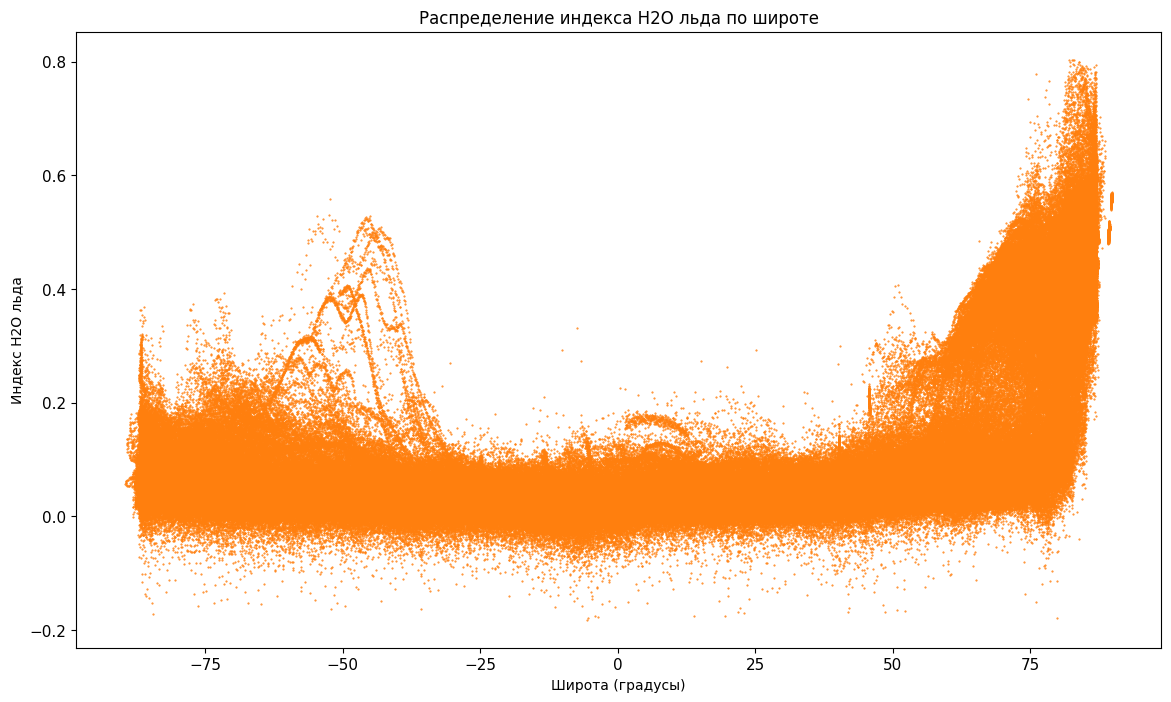

In [82]:
import matplotlib.pyplot as plt
import numpy as np

latitude = np.array(df['lat'])  
indexes_h2o = np.array(df['h2oice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("Широта (градусы)")
plt.ylabel("Индекс H2O льда")
plt.title("Распределение индекса H2O льда по широте")
ax=plt.gca()
ax.tick_params(labelsize=11) 

plt.scatter(latitude, indexes_h2o, color='C1', s=0.25)  #используется scatter, а не plot, чтобы задать размер маркера

На графике выше мы получили зависимость наличия водяного льда от широты. Что видим: лед с индексом от 0 до примерно 0,2 рапсределен равномерно по всем широтам, а на полярных широтах индекс льда заметно повышается, т.е., может быть, это означает, что лед там толще, в любом случае он точно детектируется на поверхности. Также подобный "взрыв" можно увидеть в районе 50 ю.ш. - здесь тоже повышенный индекс, но меньше плотность точек, т.е., вероятно, льда меньше, чем на севере либо по толщине, либо по, например, сплоченности, т.е. есть непокрытые участки.

Теперь построим тот же график, но для углекислотного льда. Тут еще интереснее. На протяжении всей планеты детектируется лед с низким индексом, т.е. не известно точно, есть ли он на поверхности. А вот южнее 50 широты резкое повышение, индекс подскакивает до 35, местами и выше, но однозначно больше двух, что говорит о большом количестве льда. В северном полушарии все не так ярко, но "взрывы" показателя тоже есть, просто по широте они начинаются чуть дальше и не такие высокие.

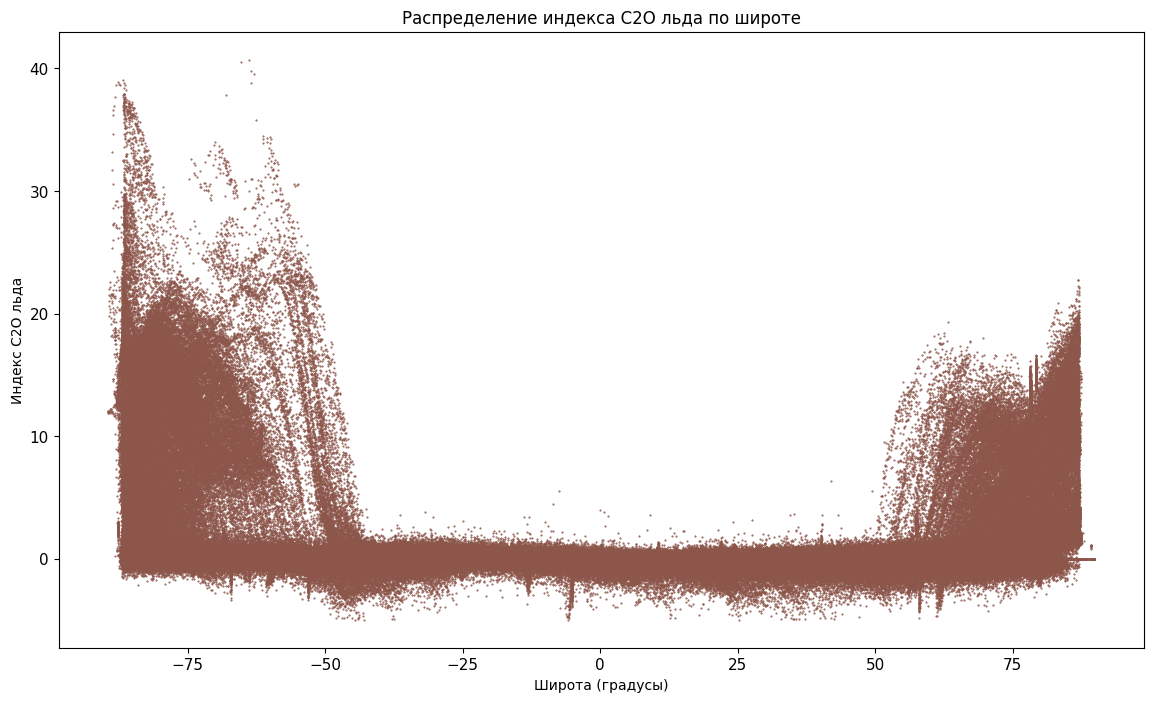

In [84]:
import matplotlib.pyplot as plt
import numpy as np

latitude = np.array(df['lat'])  
indexes_co2 = np.array(df['co2ice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("Широта (градусы)")
plt.ylabel("Индекс С2O льда")
plt.title("Распределение индекса С2O льда по широте")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(latitude, indexes_co2, color='C5', s=0.25)

Построим сезонную карту на весь год. Здесь мы просто получили не особенно информативное распределение наблюдений по дням и широте. Т.е. видно, что в начале года больше наблюдений на северных широтах, ближе к концу года переходим на южное полушарие. Возможно, это связано с движением спутника. Но как 

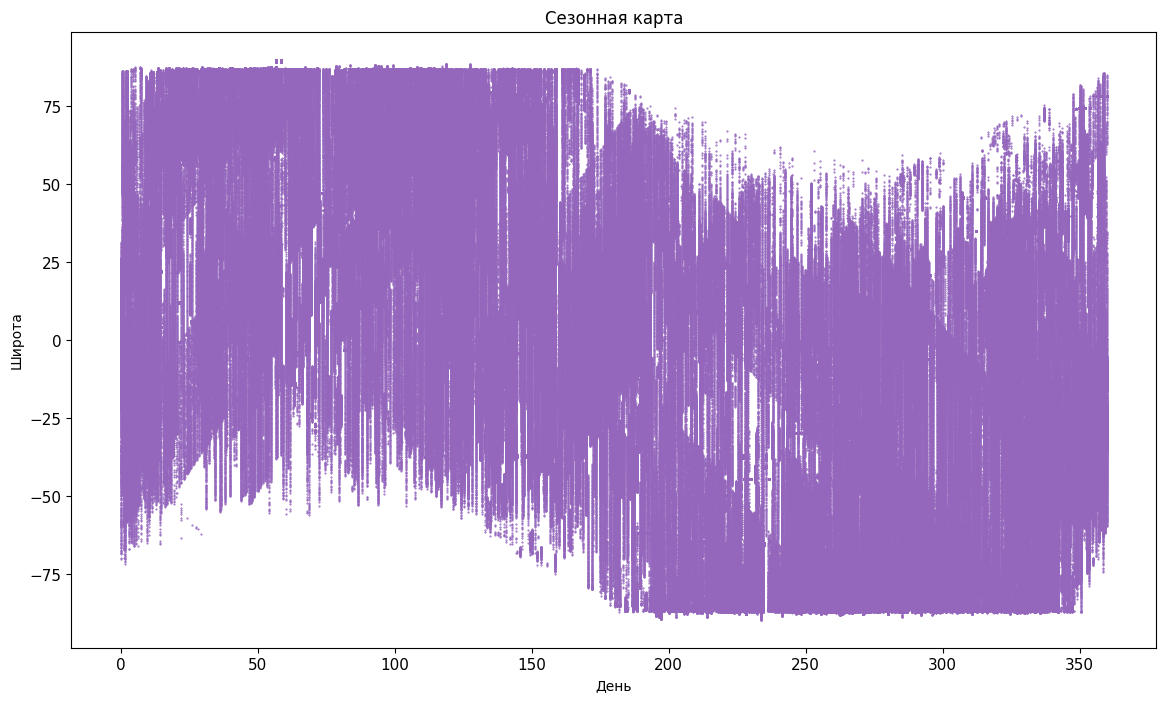

In [33]:
day = np.array(df['ls'])  
latitude = np.array(df['lat'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("День")
plt.ylabel("Широта")
plt.title("Сезонная карта")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(day,latitude, color='C4', s=0.25) 

## Гистограммы
А вот теперь я хочу построить гистограммы распределения инндексов льдов обоих видов отдельно (две ячейки ниже). Количество бинов взяла небольшое для наглядности. И тут мы видим, что для углекислотного льда больше всего наблюдений в индексах от 0 до примерно 4, т.е. не очень высоких, но примерно половина из этих наблюдений -точно детектируемый на поверхности лед. Для водяного льда в основном наблюдаются от 0 до 0,1, т.е. он меньше детектируется, значений индекса более 0,15 совсем немного.

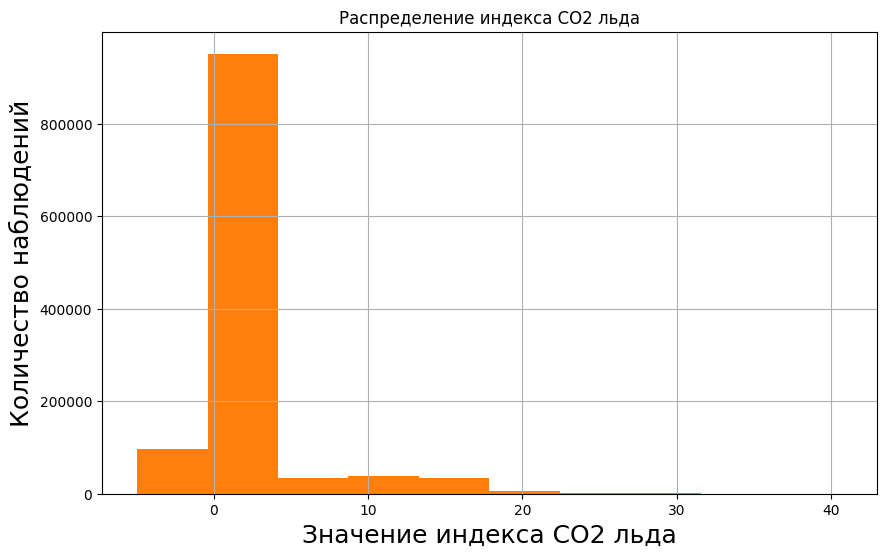

In [75]:
plt.figure(figsize=(10, 6))  
plt.hist(Mars['co2ice_index'], bins=10, color='C1')  
plt.title("Распределение индекса CO2 льда")
plt.xlabel("Значение индекса CO2 льда", fontsize=18)
plt.ylabel("Количество наблюдений", fontsize=18)
plt.grid(True)
plt.show()

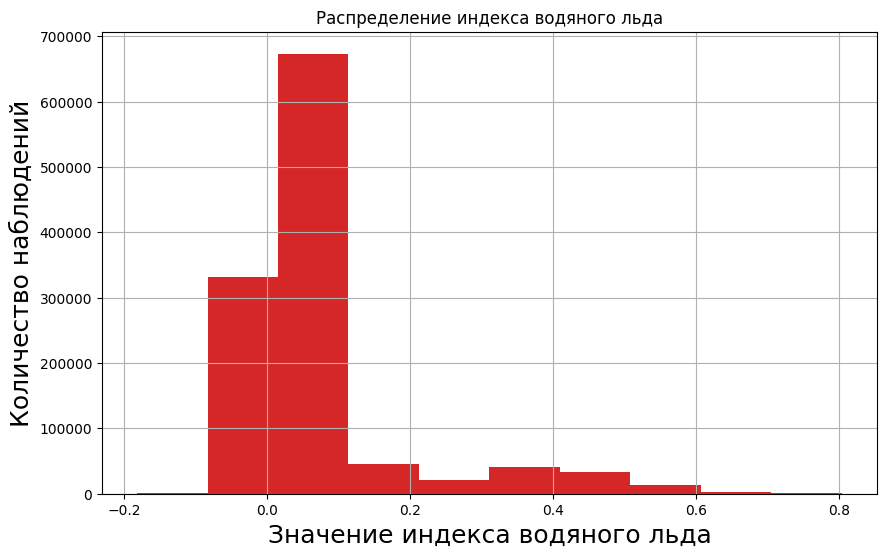

In [66]:
plt.figure(figsize=(10, 6)) 
plt.hist(Mars['h2oice_index'], bins=10, color='C3')  
plt.title("Распределение индекса водяного льда")
plt.xlabel("Значение индекса водяного льда", fontsize=18)
plt.ylabel("Количество наблюдений", fontsize=18)
plt.grid(True)
plt.show()  

На графике ниже я посмотрела распределение водяного льда по дням в году. Здесь видно, что больше всего льда приходится на период примерно с 80 до 110 дня, тут больше наблюдений и выше индексы. В остальном сильных особенностей не наблюдается.
И ниже тот же график на лед СО2. Здесь получается противоположно - увеличение льда после примерно 110 дня, т.е., несмотря на то, что графики не симметричны на 100%, можно предположить, что между ними некий баланс - больше одного вида льда, но тогда меньше другого.

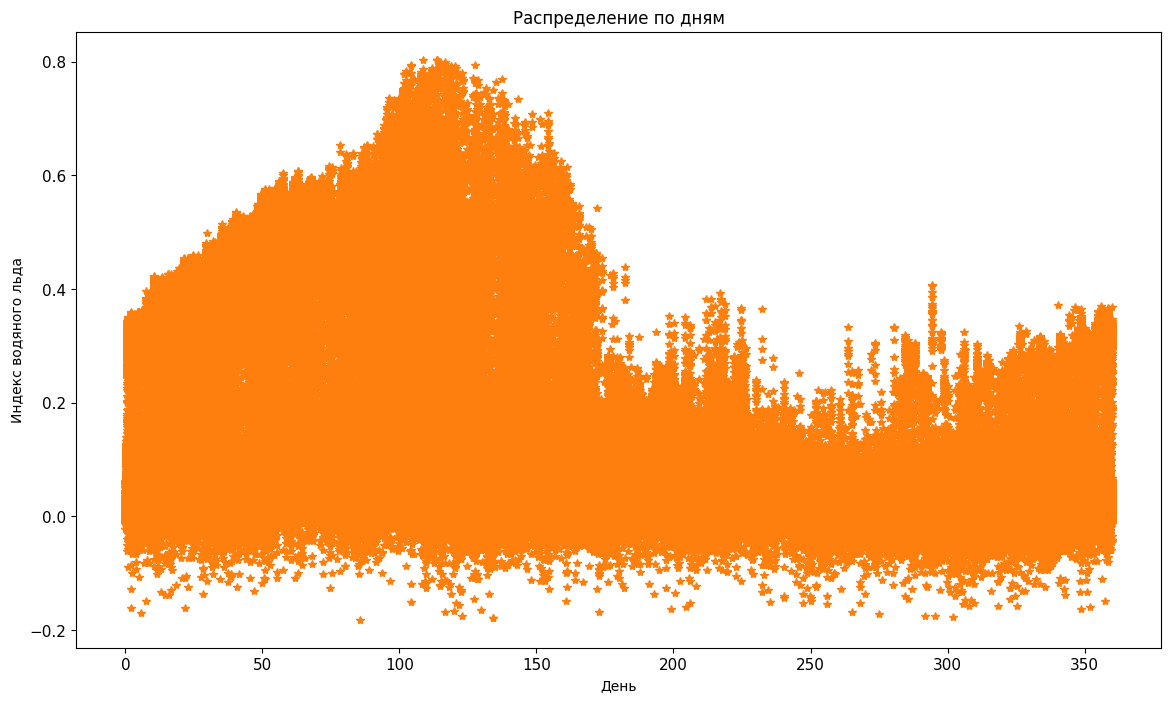

In [96]:
day = np.array(df['ls'])  
indexes_water = np.array(df['h2oice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("День")
plt.ylabel("Индекс водяного льда")
plt.title("Распределение по дням")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.plot(day,indexes_water, '*', color='C1') 

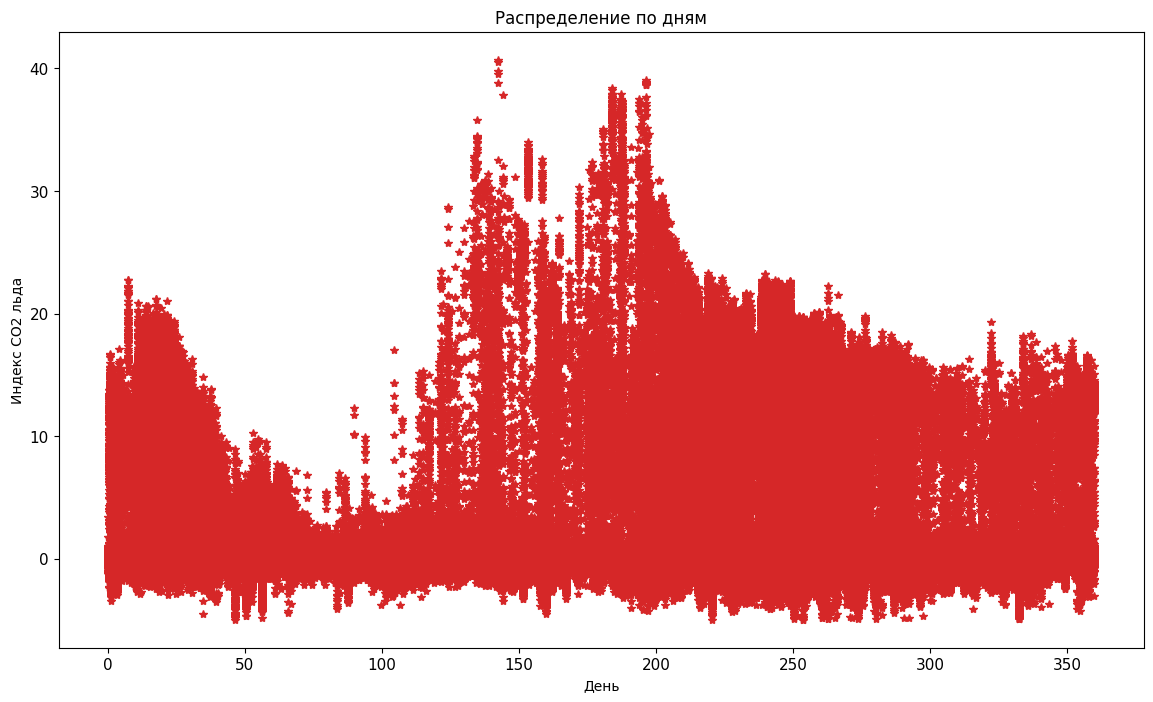

In [156]:
day = np.array(df['ls'])  
indexes_gas = np.array(df['co2ice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("День")
plt.ylabel("Индекс CO2 льда")
plt.title("Распределение по дням")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.plot(day,indexes_gas, '*', color='C3') 

## Маски
Здесь попробуем посмотреть целые графики, потом отсечем их по маскам

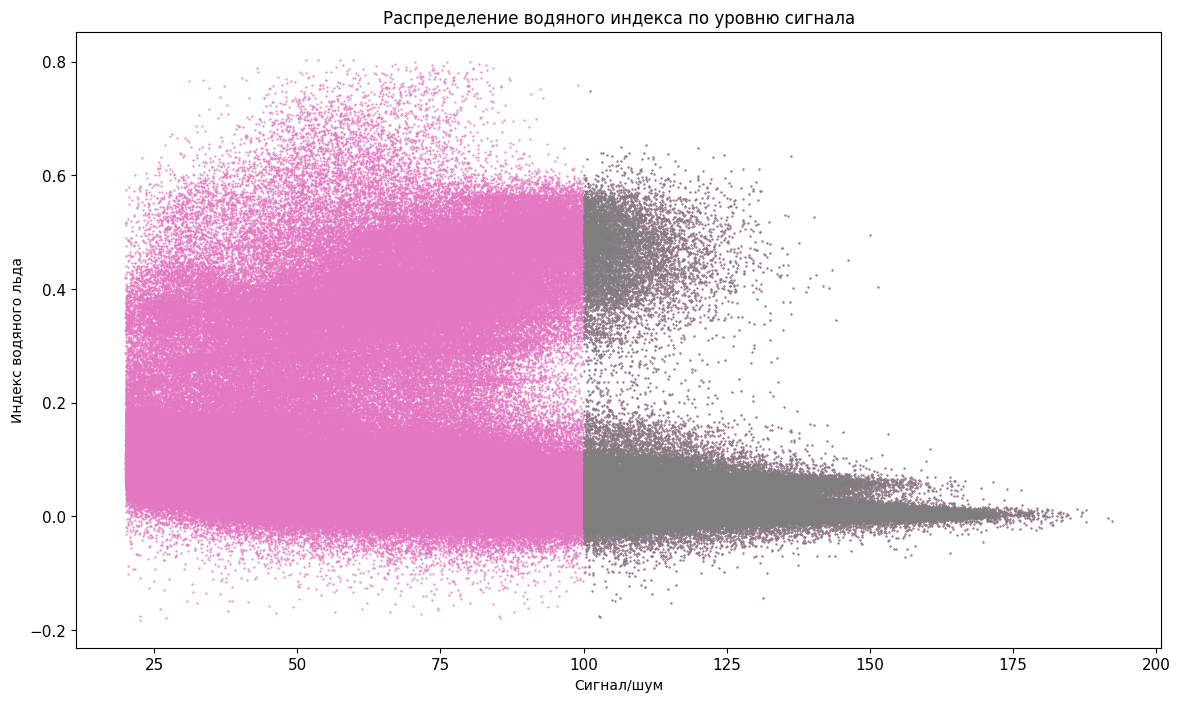

In [124]:
signal = np.array(df['snr'])  
index_water = np.array(df['h2oice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("Сигнал/шум")
plt.ylabel("Индекс водяного льда")
plt.title("Распределение водяного индекса по уровню сигнала")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(signal,index_water, color='C6', s=0.25) 
plt.scatter(signal[mask],index_water[mask], color='C7', s=0.25)

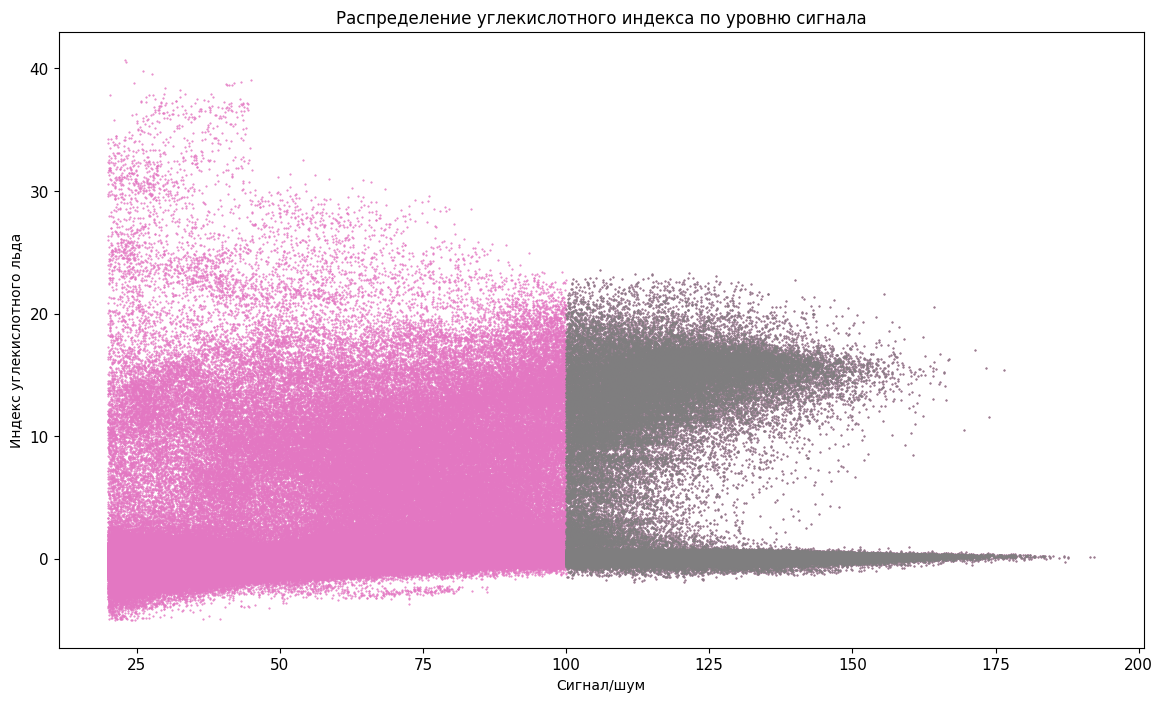

In [122]:
signal = np.array(df['snr'])  
index_gas = np.array(df['co2ice_index']) 
mask = signal > 100
plt.figure(figsize=(14, 8)) 
plt.xlabel("Сигнал/шум")
plt.ylabel("Индекс углекислотного льда")
plt.title("Распределение углекислотного индекса по уровню сигнала")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(signal,index_gas, color='C6', s=0.25)
plt.scatter(signal[mask],index_gas[mask], color='C7', s=0.25)
 

Выше мы получили два графика для льдов по уровню сигнала. В обоих случаях распределение довольно незакономерное, но видно, что там, где индекс повышен, соотношение не очень выскоое, а там, где индекс ниже, соотношение в основном выше, и самих наблюдений (точек) больше именно в среднем индексе. Но все-таки больше всего наблюдений сделаны с сигналом хорошего качества, а вот с очень высоким, где соотношение больше 100-120, значительно меньше. Маской выделили значения с высоким сигналом и ниже построили график для распределения по широте с учетом этой маски Ячнейка ниже). Откуда видим, что высокий сигнал получается в основном в пределах низкого индекса по всем ширтам, а вот по южным - высокий индекс имеет высокий сигнал, это у водяного льда. У углекислотного льда тоже высокий сигнал детектирует низкий индекс, а по полярным широтам, особенно северным, он взлетает сильно ввысь. Могу предположить, что, в полярных широтах в целом больше льда, спутник его лучше фиксирует и сигнал соответсвенно лучше.

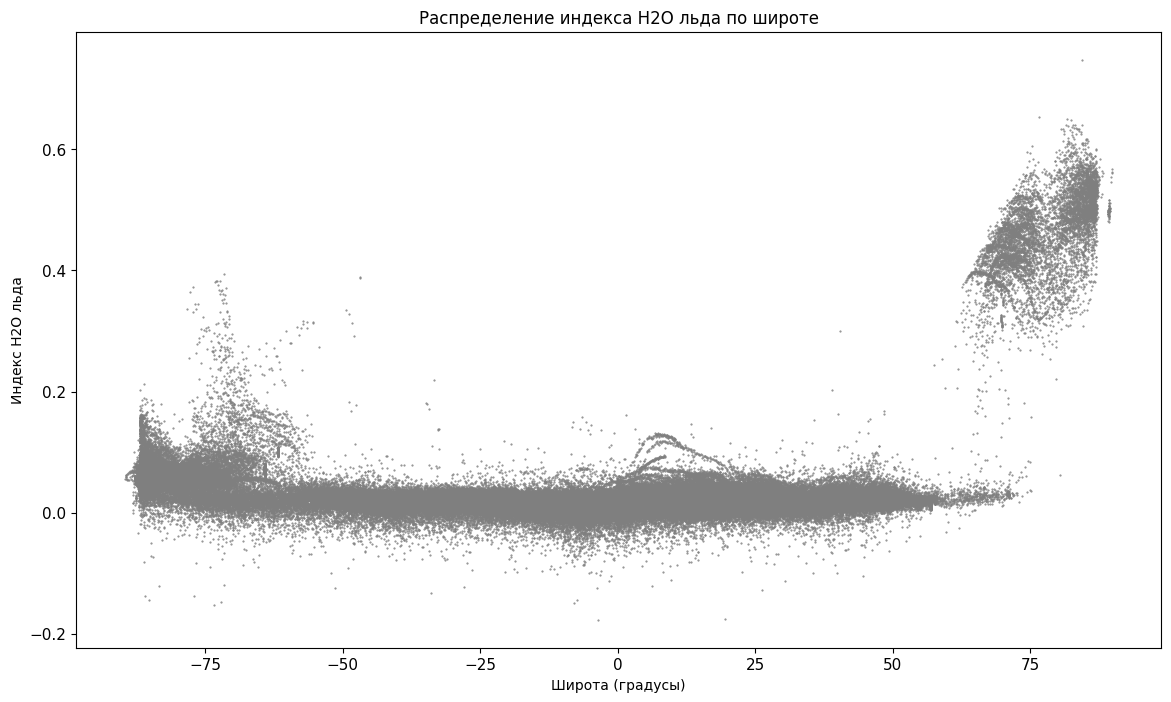

In [128]:
latitude = np.array(df['lat'])  
indexes_h2o = np.array(df['h2oice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("Широта (градусы)")
plt.ylabel("Индекс H2O льда")
plt.title("Распределение индекса H2O льда по широте")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(latitude[mask],indexes_h2o[mask], color='C7', s=0.25)


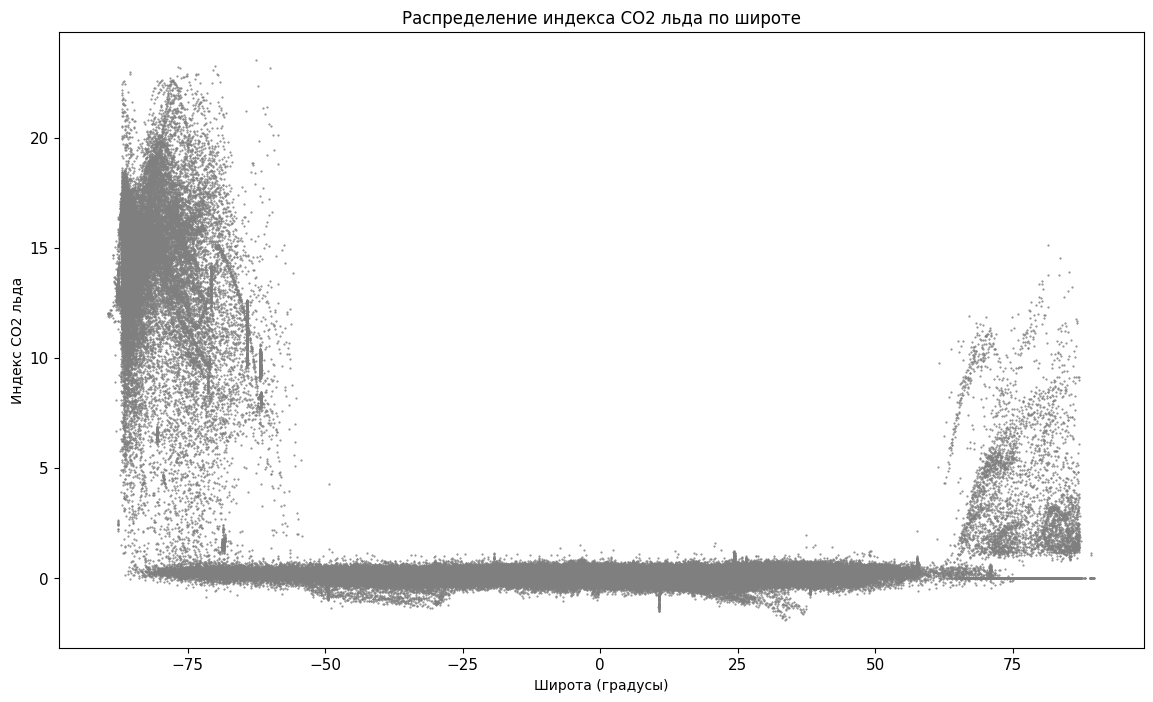

In [130]:
latitude = np.array(df['lat'])  
indexes_co2 = np.array(df['co2ice_index'])  
plt.figure(figsize=(14, 8)) 
plt.xlabel("Широта (градусы)")
plt.ylabel("Индекс CO2 льда")
plt.title("Распределение индекса CO2 льда по широте")
ax=plt.gca()
ax.tick_params(labelsize=11) 
plt.scatter(latitude[mask],indexes_co2[mask], color='C7', s=0.25)

## Выводы.
Здесь мы проанализировали загадочные данные о марсианском льде, полученные с помощью прибора SPICAM-IR, построили несколько графиков и гистограм распределения. Из проделанной работы могу что водяной лед и углекислотный лед "идут рука об руку" и, как мне показалось, взаиомсвязаны между собой и их количество привязано к широте местности.

